In [28]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
# 60k entries, each of 28x28 dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Preprocessing

+ The MNIST images have a depth of only 1, so, we explicitly declare it

In [31]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# X_train[0] ---> checking the range of values in the image
# changing all values to float and dividing by 255 to bring them between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Dividing by 255
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [32]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Creating and compiling the model

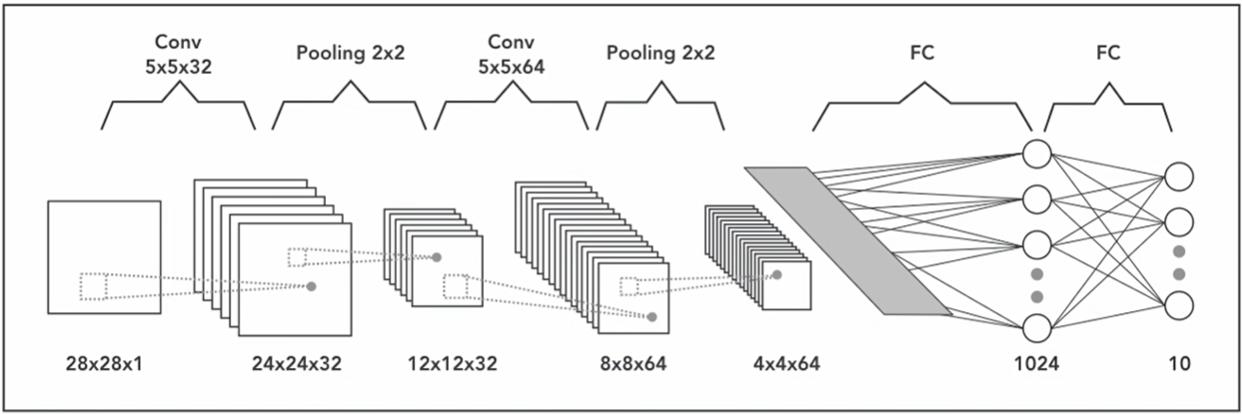

In [33]:
cnn = Sequential()

In [34]:
# Adding the Convolutional Layer
cnn.add(Conv2D(32, kernel_size = (5,5), input_shape = (28, 28, 1), padding = 'same', activation = 'relu'))
# Padding = 'same':  it applies padding to the input image so that the input image gets fully covered by the filter
#        and specified stride. It is called SAME because, for stride 1 , the output will be the same as the input.

In [35]:
# Adding the max pooling layer
cnn.add(MaxPooling2D())

In [36]:
# Adding another convolutional layer
cnn.add(Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu'))

In [37]:
# Adding another max pooling layer
cnn.add(MaxPooling2D())

In [38]:
# Flattening the network
cnn.add(Flatten())

In [39]:
# Adding Dense layer for a fully-connected network
cnn.add(Dense(1024, activation = 'relu'))

In [40]:
# Adding the ouput layer - Softmax for multiclass output
cnn.add(Dense(10, activation = 'softmax'))

<b>Compiling the model</b>

In [41]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
print(cnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

## Training the model

In [45]:
history_cnn = cnn.fit(X_train, y_train, epochs = 5, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 2/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0213 - val_accuracy: 0.9936
Epoch 3/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0271 - val_accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0410 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0296 - val_accuracy: 0.9912


In [46]:
score = cnn.evaluate(X_test, y_test)
score

313/313 [==============================] - 4s 13ms/step - loss: 0.0296 - accuracy: 0.9912


[0.02961709350347519, 0.9911999702453613]